In [12]:
import numpy as np
from scipy.integrate import solve_ivp
import plotly.graph_objects as go

# 1.Równania Lotki-Volterry

In [13]:
def lotka_volterra3D(t,state, a, b, c):
    x, y, z = state
    dx_dt = x*(a[0] + y*b[0] + z*c[0])
    dy_dt = y*(a[1] + x*b[1] + z*c[1])
    dz_dt = z*(a[2] + x*b[2] + y*c[2])
    return [dx_dt, dy_dt, dz_dt]

# 2.Parametry układu

In [14]:
#parametry zależności
a = [2, -1, -0.5]
b = [-1, 0.1, 0.1]
c =[-0.1, -1, 0.1]

#stan początkowy
initial_state = [1.0, 1.0, 1.0]

# Przedział czasu symulacji i kroki
start_time = 0.0
end_time = 50.0
num_points = 10000

# Przygotowanie osi czasu
time = np.linspace(start_time, end_time, num_points)


# 3. Rozwiązanie numeryczne układu

In [15]:
#najprostszą metodą bez zbytnich fajerwerków
solution = solve_ivp(
    lotka_volterra3D,
    [start_time, end_time],
    initial_state,
    t_eval=time,
    args=(a, b, c),
    method='RK45'
)

# Ekstrakcja wyników
x, y, z = solution.y


# 4. Wykres trajektorii

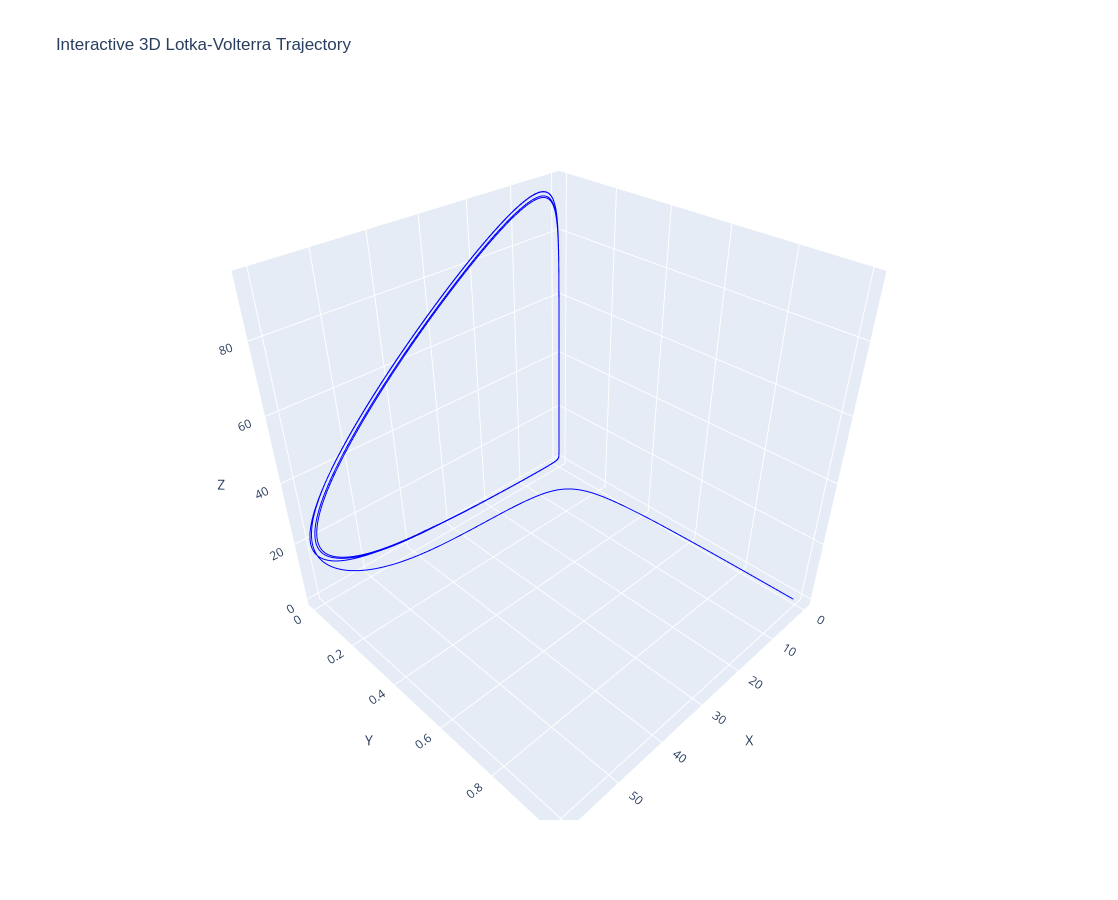

In [18]:
# Create interactive 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=x, y=y, z=z,
    mode='lines',
    line=dict(color='blue', width=2)
)])

fig.update_layout(
    title="Interactive 3D Lotka-Volterra Trajectory",
    width=1200,   # Width in pixels
    height=900,  # Height in pixels
    scene=dict(
        xaxis_title="X",
        yaxis_title="Y",
        zaxis_title="Z"
    )
)

fig.show()